In [567]:
#https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [569]:
sns.set()

# Importing the data and inspecting it

In [570]:
datapath = "C:\\Users\\gregl\\Desktop\\ML_Projects\\Iris Flower Classification\\IRIS.csv"
df = pd.read_csv(datapath)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [572]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [573]:
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

In [574]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0


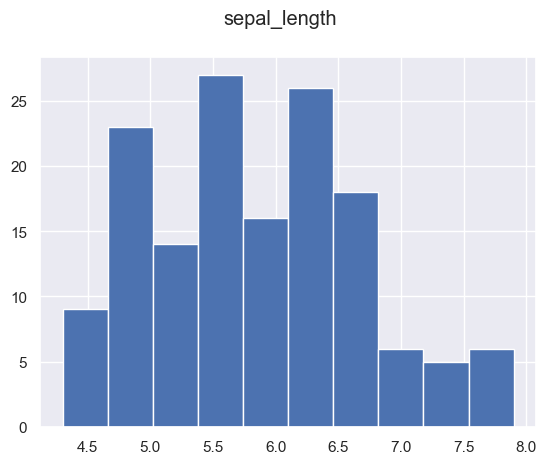

In [575]:
col = 'sepal_length'
df[col].hist()
plt.suptitle(col)
plt.show()

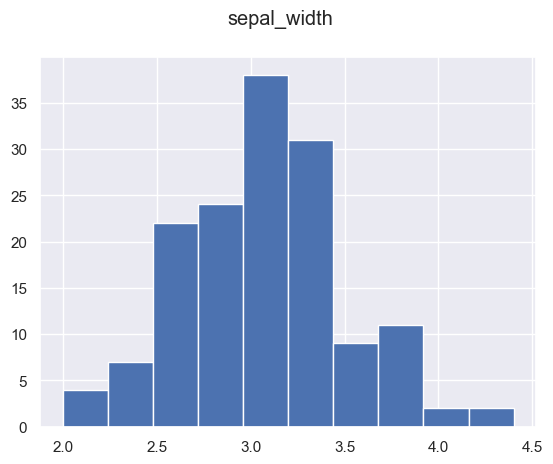

In [576]:
col = 'sepal_width'
df[col].hist()
plt.suptitle(col)
plt.show()

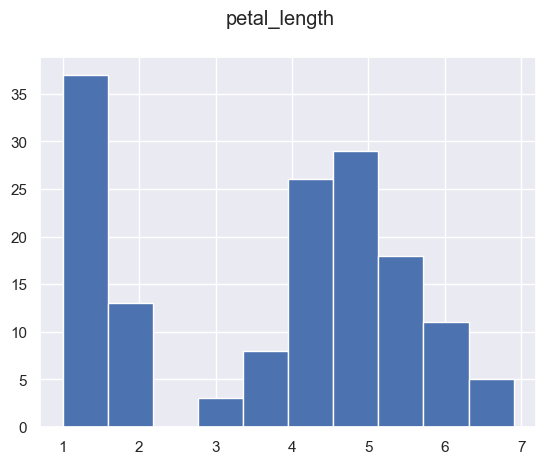

In [577]:
col = 'petal_length'
df[col].hist()
plt.suptitle(col)
plt.show()

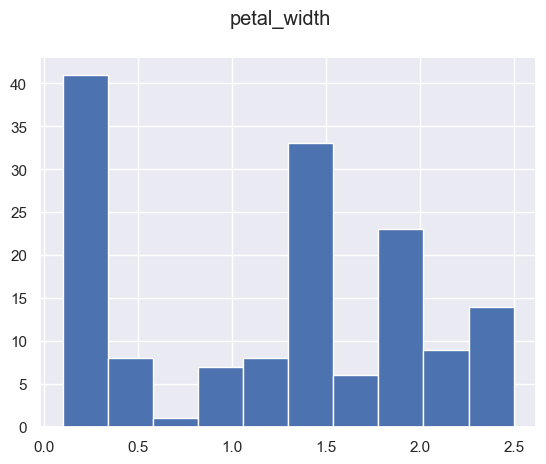

In [578]:
col = 'petal_width'
df[col].hist()
plt.suptitle(col)
plt.show()

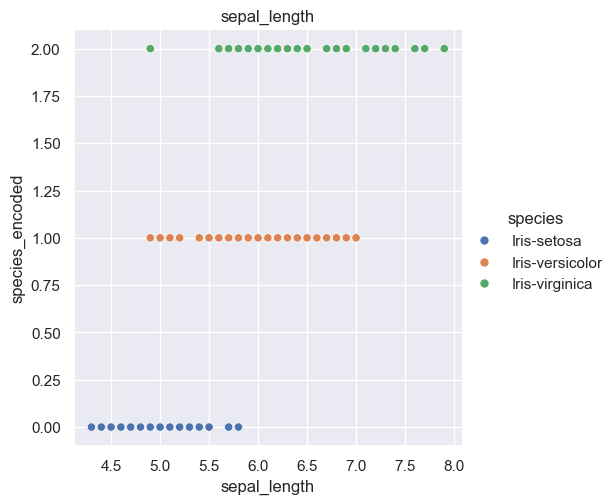

In [579]:
col = 'sepal_length'
sns.relplot(data=df, x=col, y='species_encoded', hue='species')
plt.title(col)
plt.show()

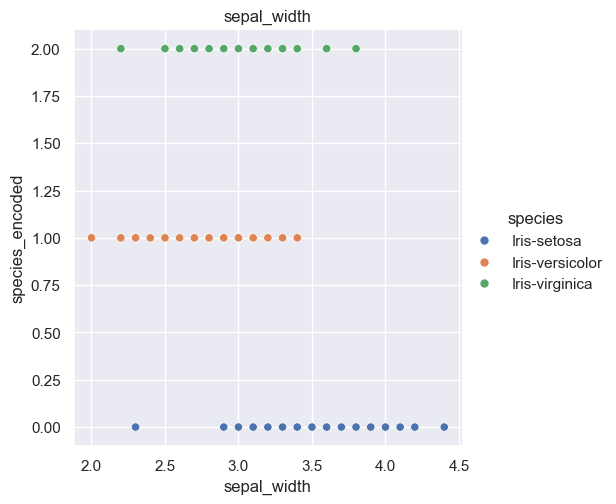

In [580]:
col = 'sepal_width'
sns.relplot(data=df, x=col, y='species_encoded', hue='species')
plt.title(col)
plt.show()

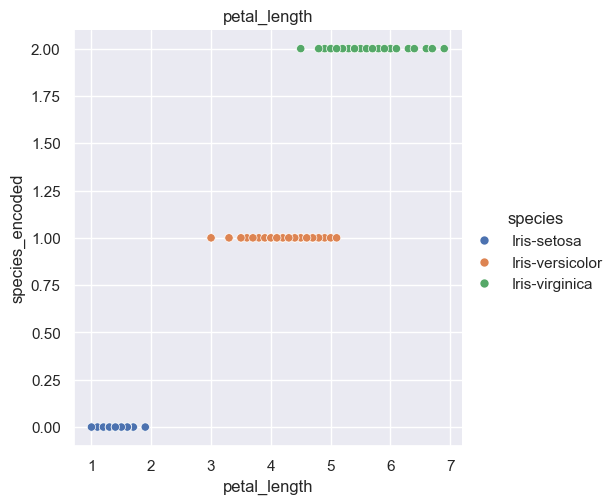

In [581]:
col = 'petal_length'
sns.relplot(data=df, x=col, y='species_encoded', hue='species')
plt.title(col)
plt.show()

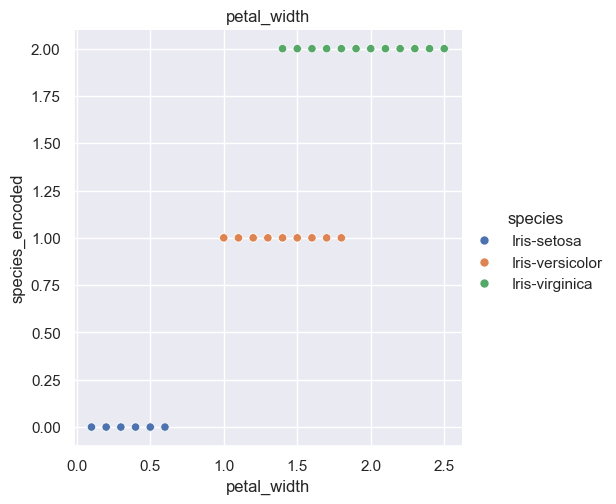

In [582]:
col = 'petal_width'
sns.relplot(data=df, x=col, y='species_encoded', hue='species')
plt.title(col)
plt.show()

# Pairplot - an easy and efficient way to do EDA

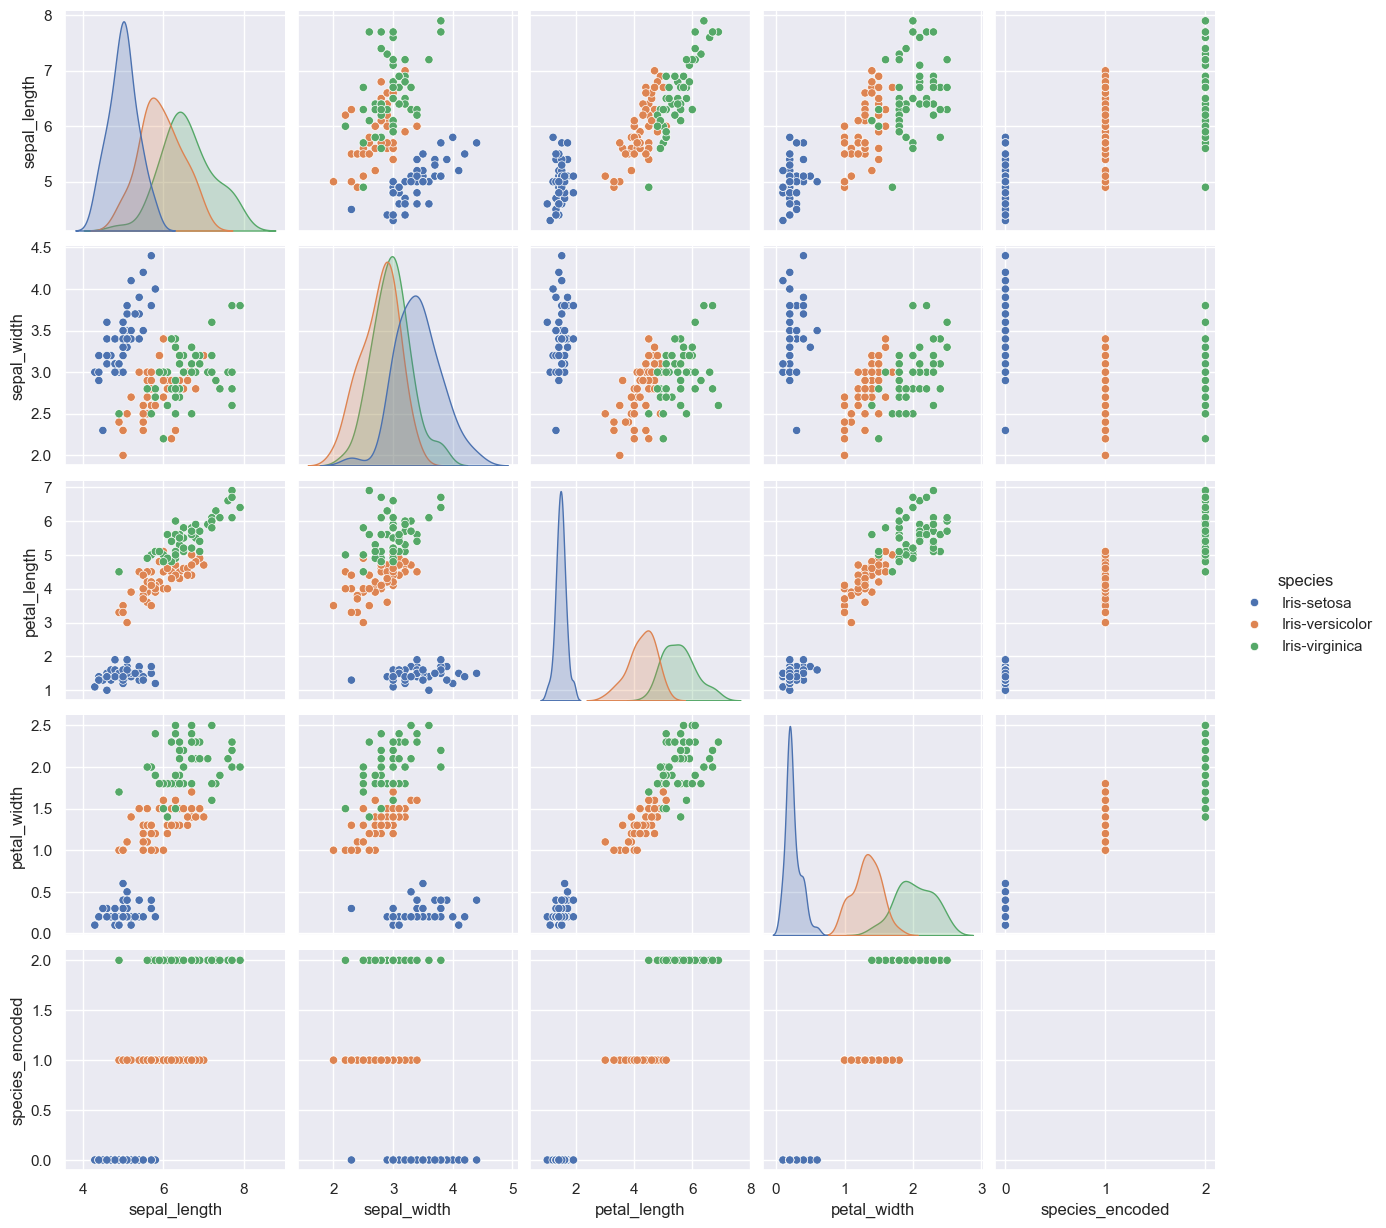

In [583]:
_ = sns.pairplot(df, hue='species')

In [584]:
df_train, df_test =  train_test_split(df, test_size = 0.25)

In [585]:
df_train.shape

(112, 6)

In [586]:
df_test.shape

(38, 6)

In [587]:
df_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
119,6.0,2.2,5.0,1.5,Iris-virginica,2
92,5.8,2.6,4.0,1.2,Iris-versicolor,1
86,6.7,3.1,4.7,1.5,Iris-versicolor,1
51,6.4,3.2,4.5,1.5,Iris-versicolor,1
91,6.1,3.0,4.6,1.4,Iris-versicolor,1


In [588]:
X_train = df_train.drop(columns= ['species', 'species_encoded']).values
y_train = df_train['species_encoded'].values

# Modeling - What is our baseline?
### The Baseline accuracy of our model should be at the least .33 or 33% as we only have 3 classes in an evenly distributed dataset
#### Let's make a manual tree based model

In [589]:
def single_feature_prediction(petal_length):
    """Predicts the Iris species given the petal length."""
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2
    

In [590]:
X_train[:, 2]

array([5. , 4. , 4.7, 4.5, 4.6, 4.7, 4. , 3.5, 4.5, 5.6, 1.6, 4.9, 1. ,
       5.2, 5.7, 5. , 1.5, 1.3, 1.5, 5.8, 5.8, 5.1, 1.1, 3.9, 6.3, 5.1,
       4.3, 1.4, 5.6, 4.9, 1.6, 1.2, 6.1, 1.4, 4.7, 1.5, 5.7, 1.5, 1.3,
       1.7, 3.6, 4.1, 6. , 1.7, 1.4, 4.7, 5.5, 4.8, 4.5, 1.4, 1.4, 5.4,
       6.4, 1.3, 6.7, 3.8, 1.4, 5.1, 1.2, 1.5, 1.3, 4.2, 1.4, 4.4, 1.5,
       5.9, 5.7, 5.4, 4.6, 4.9, 1.5, 6.6, 4.3, 4.5, 1.5, 5.5, 5.6, 1.4,
       3.3, 4. , 5.1, 4.8, 1.4, 4.8, 1.5, 4.1, 5.8, 1.5, 6.1, 5.5, 5.9,
       4.8, 1.7, 3. , 1.6, 5.6, 1.5, 4.4, 3.9, 1.6, 1.7, 3.3, 5.6, 1.3,
       4.5, 1.5, 1.6, 1.4, 6.7, 5.3, 4.4, 4.9])

In [591]:
manual_y_predictions = np.array([single_feature_prediction(val) for val in X_train[:, 2]])
manual_y_predictions

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0,
       0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 2])

In [592]:
y_train

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 2])

In [593]:
manual_model_acuracy = np.mean(manual_y_predictions == y_train)
manual_model_acuracy

np.float64(0.9642857142857143)

In [594]:
print(f'Manual model accuracy: {manual_model_acuracy *100:.2f}%')

Manual model accuracy: 96.43%


## The rudimentary tree based model we created has an accuracy of .95 or 95%

# Model using LogisticRegression

In [595]:
model = LogisticRegression(max_iter=200)

In [596]:
Xt, Xv, yt, yv = train_test_split(X_train, y_train, test_size=0.25)

In [597]:
model.fit(Xt, yt)

LogisticRegression(max_iter=200)

In [598]:
y_pred = model.predict(Xv)

In [599]:
model.score(Xv, yv)

0.9285714285714286

## Using cross_validation to evaluate the model

In [600]:
accuracies= cross_val_score(model, X_train, y_train, cv= 5, scoring="accuracy")

In [601]:
np.mean(accuracies)

np.float64(0.9735177865612649)

# Where we are misclassifying points?

In [602]:
y_pred = cross_val_predict(model, X_train, y_train, cv= 5)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 0,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0,
       2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 2,
       1, 2])

In [603]:
predicted_correctly_mask = y_pred == y_train
predicted_correctly_mask

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [604]:
not_predicted_correctly = ~predicted_correctly_mask

In [605]:
X_train[~predicted_correctly_mask]

array([[6. , 2.2, 5. , 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8]])

In [606]:
df_predictions = df_train.copy()

In [607]:
species_map = {
    0: "Iris-setosa",
    1: "Iris-versicolor",
    2: "Iris-virginica"
}
df_predictions["correct_prediction"] = predicted_correctly_mask
df_predictions["predictions"] = y_pred
df_predictions["prediction_label"] = df_predictions["predictions"].map(species_map)

In [608]:
df_predictions.head()
order = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

<Axes: xlabel='petal_length', ylabel='petal_width'>

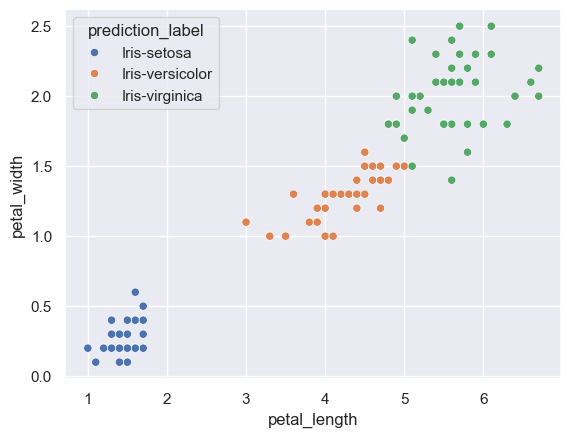

In [609]:
sns.scatterplot(x="petal_length", y="petal_width", hue_order=order, hue="prediction_label", data=df_predictions)

<Axes: xlabel='petal_length', ylabel='petal_width'>

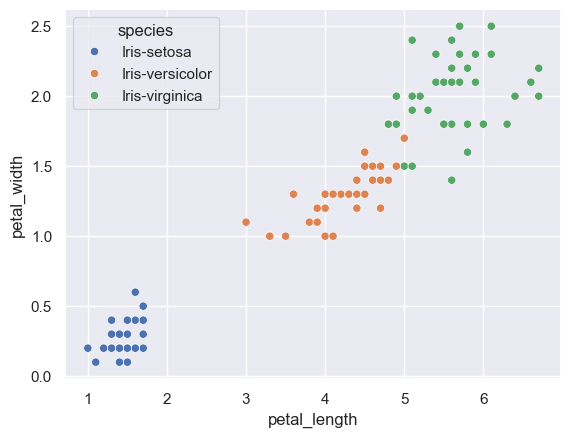

In [610]:
sns.scatterplot(x="petal_length", y="petal_width", hue_order=order, hue="species", data=df_predictions)

In [611]:
df_predictions.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded,correct_prediction,predictions,prediction_label
119,6.0,2.2,5.0,1.5,Iris-virginica,2,False,1,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor,1,True,1,Iris-versicolor
86,6.7,3.1,4.7,1.5,Iris-versicolor,1,True,1,Iris-versicolor


In [612]:
def plot_incorrect_predictions(df_predictions, x_axis_feature, y_axis_feature):
    fig, axs = plt.subplots(2, 2, figsize=(10,10))
    axs = axs.flatten()
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue_order=order, hue="prediction_label", data=df_predictions, ax=axs[0])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue_order=order, hue="species", data=df_predictions, ax=axs[1])
    sns.scatterplot(x=x_axis_feature, y=y_axis_feature, hue="correct_prediction", data=df_predictions, ax=axs[2])
    axs[3].set_visible(False)
    
    
    plt.show()


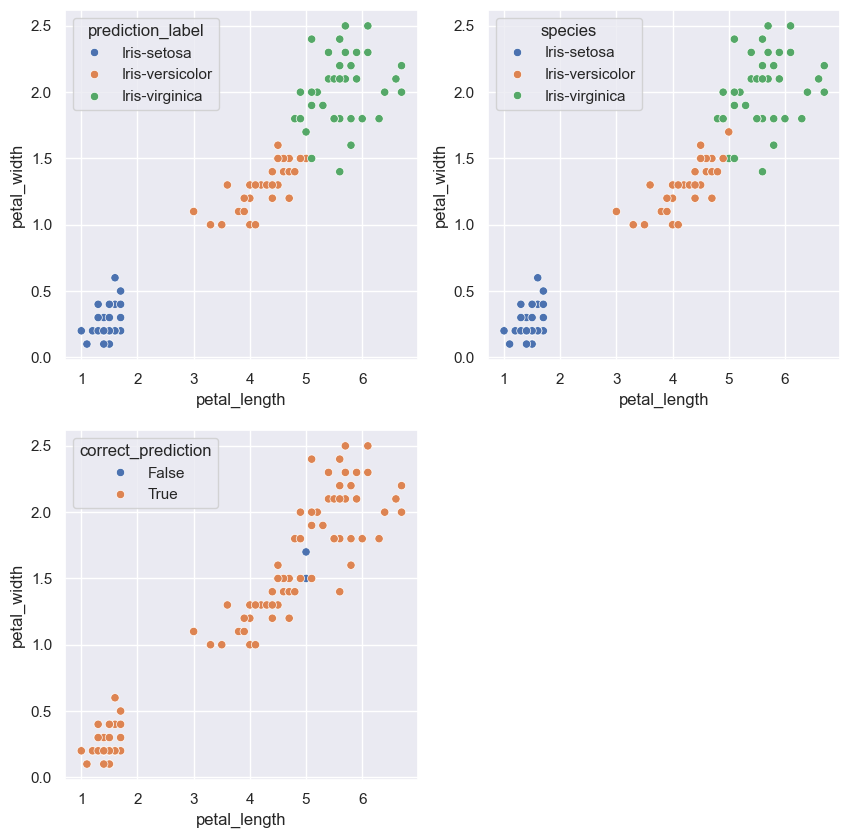

In [613]:
plot_incorrect_predictions(df_predictions, "petal_length", "petal_width")

# Model Tuning

In [614]:
for reg_param in (0.1, 0.3, 1, 5, 10, 100):
    print(reg_param)
    model = LogisticRegression(max_iter=200, C=reg_param)
    accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f'Manual model accuracy: {np.mean(accuracies) *100:.2f}%')

0.1
Manual model accuracy: 94.66%
0.3
Manual model accuracy: 97.35%
1
Manual model accuracy: 97.35%
5
Manual model accuracy: 97.35%
10
Manual model accuracy: 97.35%
100
Manual model accuracy: 95.53%


In [615]:
model = LogisticRegression(max_iter=200, C=5)

# Let's test our model on the tesr set

In [616]:
X_test = df_test.drop(columns= ['species', 'species_encoded']).values
y_test = df_test['species_encoded'].values

## Train the model on the full Training Dataset

In [617]:
model.fit(X_train, y_train)

LogisticRegression(C=5, max_iter=200)

In [618]:
y_test_pred= model.predict(X_test)

In [619]:
test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

In [621]:
print(f"Test set accuracy: {test_set_accuracy * 100:2f}%")

Test set accuracy: 97.368421%


In [623]:
test_set_correctly_classified

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# In conclusion we have a very reliable model, results may vary due to the nature of the small dataset